In [17]:
'''
K-Means Clustering is an Unsupervised Learning algorithm, which groups the 
unlabeled dataset into different clusters. Here K defines the number of 
pre-defined clusters that need to be created in the process, as if K=2, there 
will be two clusters, and for K=3, there will be three clusters, and so on.
It is an iterative algorithm that divides the unlabeled dataset into k different
clusters in such a way that each dataset belongs only one group that has 
similar properties.
'''

'\nK-Means Clustering is an Unsupervised Learning algorithm, which groups the \nunlabeled dataset into different clusters. Here K defines the number of \npre-defined clusters that need to be created in the process, as if K=2, there \nwill be two clusters, and for K=3, there will be three clusters, and so on.\nIt is an iterative algorithm that divides the unlabeled dataset into k different\nclusters in such a way that each dataset belongs only one group that has \nsimilar properties.\n'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
dataset=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.shape

(200, 5)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
#no null values.

In [10]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
#choosing the annual income and spending score column.
X=dataset.iloc[:,[3,4]].values
#taking columns of index 3 and 4 as they are annual income and spending score
#columns.

In [12]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [13]:
#choosing the no. of clusters./OPTIMUM NO. OF CLUSTERS FOR DATASET
#WCSS-WITHIN CLUSTER SUM OF SQUARES.
#WCSS- IT TENDS TO FINDS DISTANCE BETWEEN EACH DATA POINT AND ITS CENTROID IN A CLUSTER.
#FINDING WCSS FOR DIFFERENT VALUE OF CLUSTERS.

In [15]:
wcss=[]
for i in range(1,11): #good initiation method is k_means++.
  kme=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kme.fit(X)
  wcss.append(kme.inertia_)
#appending wcss values in wcss list.

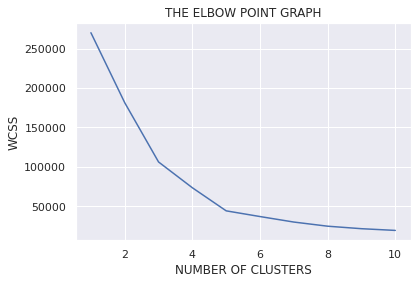

In [16]:
#ELBOW GRAPH
sns.set()
plt.plot(range(1,11),wcss)
plt.title('THE ELBOW POINT GRAPH')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

In [18]:
'''
The elbow method is a graphical representation of finding the optimal 'K' in 
a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) 
i.e. the sum of the square distance between points in a cluster and the 
cluster centroid.
'''

"\nThe elbow method is a graphical representation of finding the optimal 'K' in \na K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) \ni.e. the sum of the square distance between points in a cluster and the \ncluster centroid.\n"

In [19]:
#FROM GRAPH WE FIND CUTOFF POINTS AT 3 AND 5.
#THESE CUTOFF POINTS ARE CALLED ELBOW POINTS.
#AFTER ELBOW POINT=5 THERE IS NO SHARP SIGNIFICANT DROP SO THE 
#OPTIMUM NO. OF CLUSTERS=5.

In [20]:
#TRAINING THE K MEANS CLUSTERING MODEL WITH NO. OF CLUSTERS = 5 .I.E. 
#OPTIMUM NO. OF CLUSTERS.
kme=KMeans(n_clusters=5,init="k-means++",random_state=0)
#RETURN A LABEL FOR EACH DATA POINT BASED ON THEIR CLUSTER.
Y=kme.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [21]:
#VISUALIZING ALL THE CLUSTERS.
#5 clusters- 0,1,2,3,4

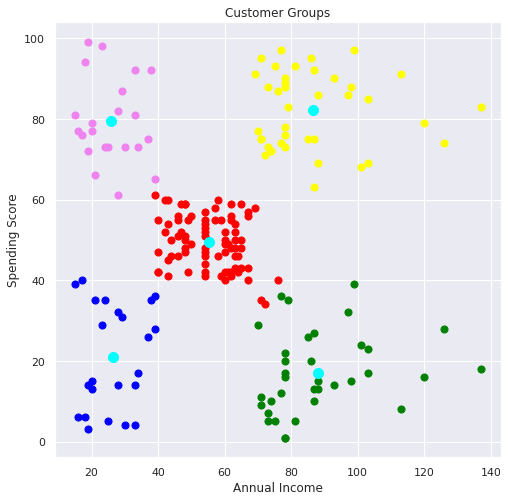

In [23]:
#PLOTTING ALL CLUSTERS AND THEIR CENTROIDS.
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')  #s-size of dots/points
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='violet',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='blue',label='Cluster 5')
#for X[Y==0,0] IT REPRESENTS Y==0 REPRESENTS CLUSTER NO AND THE 2ND 0
#REPRESENTS THE ANNUAL INCOME COLUMN.  ---> FOR X AXIS
#for X[Y==0,1] I.E. 2ND PART REPRESENTS Y AXIS.HERE ALSO Y==0 REPRESENTS
#CLUSTER NO. AND 1 REPRESENTS SPENDING SCORES. --->FOR Y AXIS.
plt.scatter(kme.cluster_centers_[:,0],kme.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')
#1st is x coordinate, 2nd is y-coordinate.
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [24]:
#THE ABOVE PLOT SHOWS PEOPLE WITH DIFFERENT TYPES OF ANNUAL INCOME
#AND THEIR DIFFERENT SPENDING APPROACHES OR SPENDING SCORES.